# EDA Assignment -- Flight Price and google playstore dataset

## Flight price

Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

In [33]:
import pandas as pd
flight_df = pd.read_excel('flight_price.xlsx')
flight_df.shape

(10683, 11)

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

<AxesSubplot: xlabel='Price', ylabel='Count'>

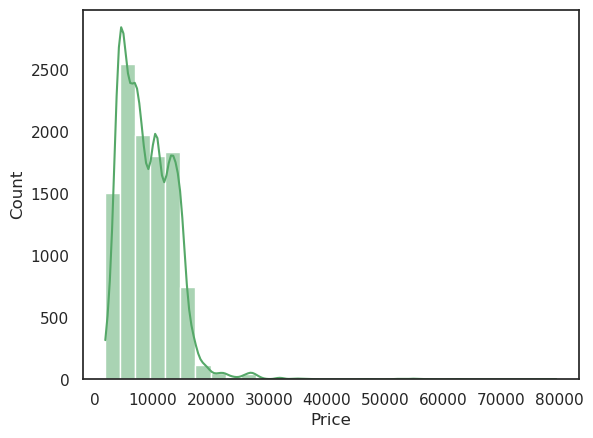

In [35]:
sns.histplot(data=flight_df,x='Price',bins=30,kde=True,color='g')


It is a right skewed distribution

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [36]:
flight_df['Price'].max()

79512

In [37]:
flight_df['Price'].min()

1759

Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

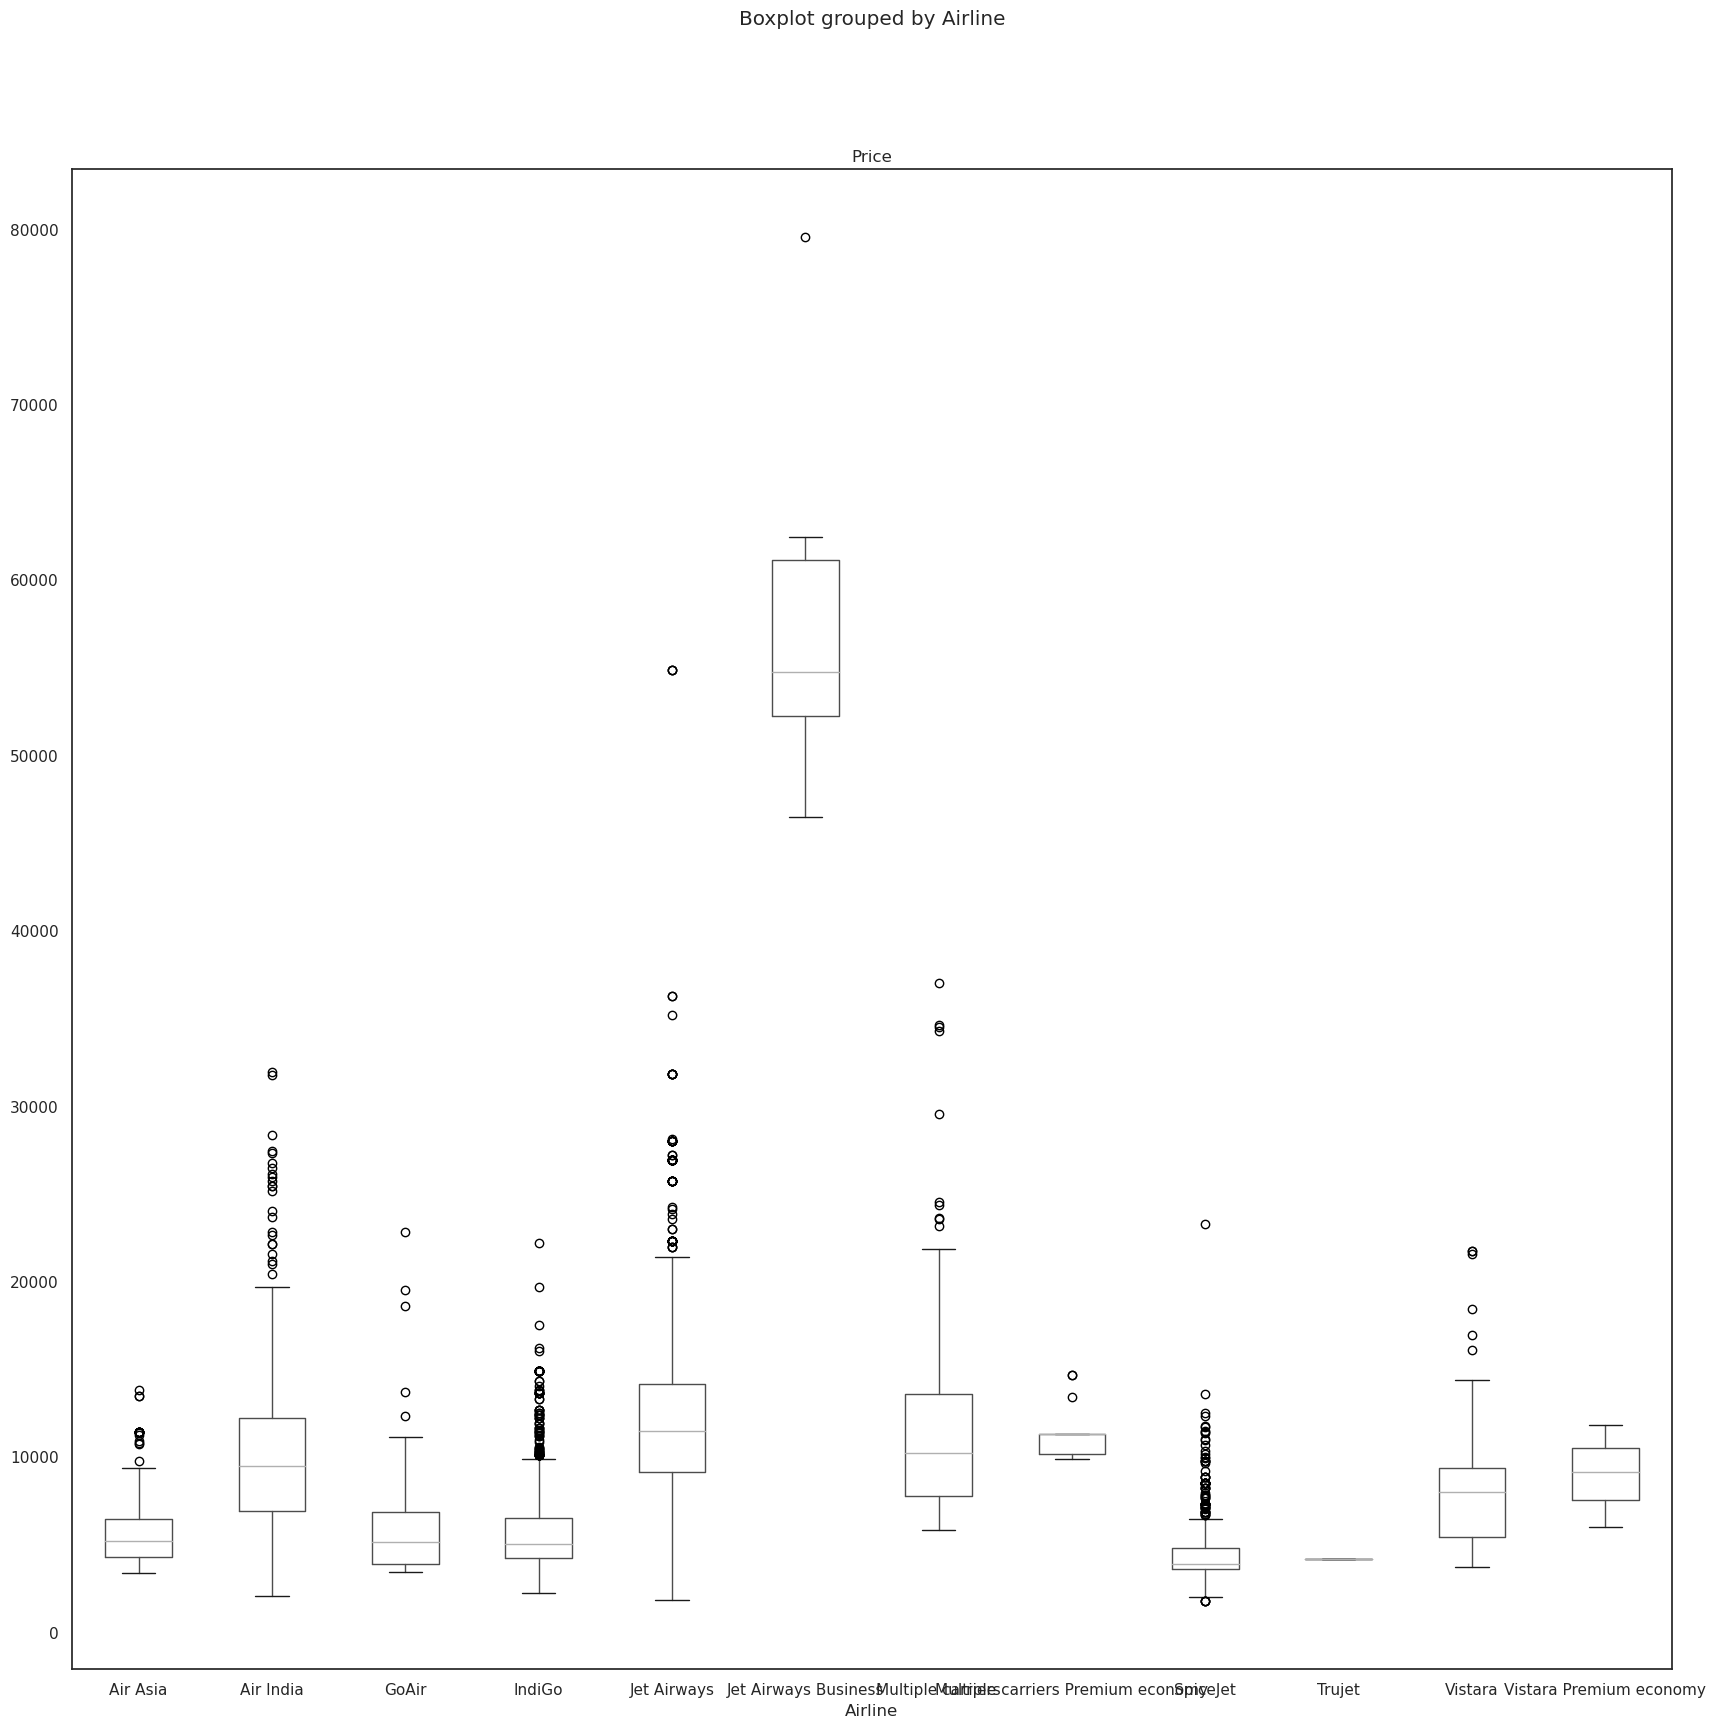

In [38]:
boxplot=flight_df.boxplot(column=['Price'], by='Airline', grid=False, figsize= (20,20))

In [39]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

In [40]:
flight_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


<AxesSubplot: >

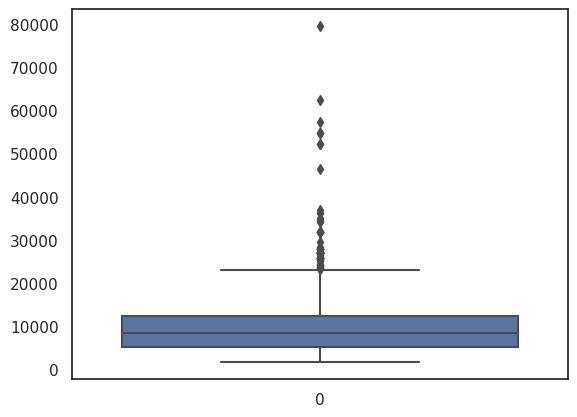

In [41]:
sns.boxplot(flight_df['Price'])

Yes it has outlier. The mean and max val difference are significantly high. Also proven in the boxplot.

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?

Date of Journey would be the column. We split the date into months day and year, find out which month are the peak season

In [42]:
## Feature Engineering
flight_df['Date']=flight_df['Date_of_Journey'].str.split('/').str[0]
flight_df['Month']=flight_df['Date_of_Journey'].str.split('/').str[1]
flight_df['Year']=flight_df['Date_of_Journey'].str.split('/').str[2]

flight_df['Date']=flight_df['Date'].astype(int)
flight_df['Month']=flight_df['Month'].astype(int)
flight_df['Year']=flight_df['Year'].astype(int)

flight_df['Month'].mode()

flight_df['Month'].describe()

count    10683.000000
mean         4.708602
std          1.164357
min          3.000000
25%          3.000000
50%          5.000000
75%          6.000000
max          6.000000
Name: Month, dtype: float64

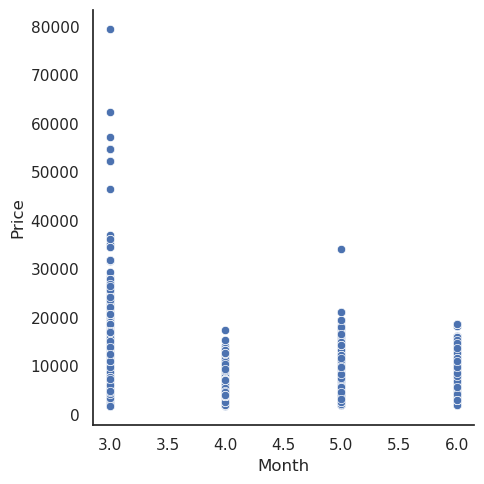

In [43]:
sns.relplot(data=flight_df, x = 'Month', y = 'Price')
           
# sns.relplot(data=tips, x="total_bill", y="tip")


March is the peak season as the price is higher

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?

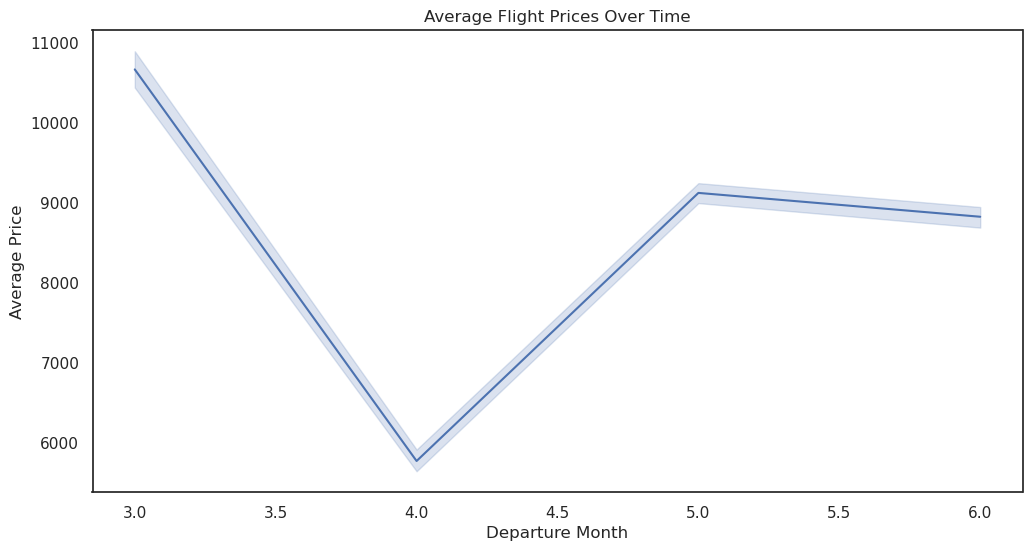

In [48]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Price', data=flight_df)
plt.title('Average Flight Prices Over Month')
plt.xlabel('Departure Month')
plt.ylabel('Average Price')
plt.show()

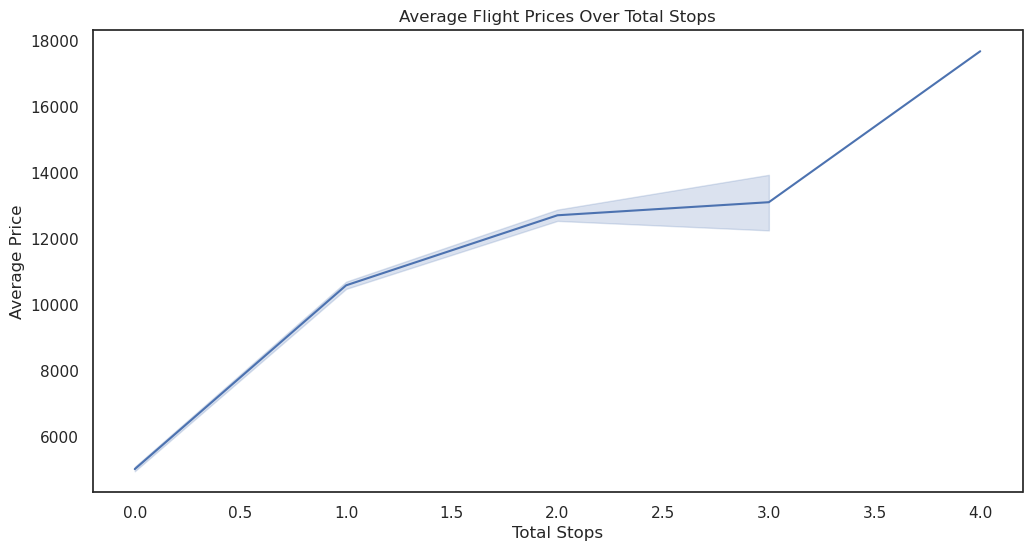

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Total_Stops', y='Price', data=flight_df)
plt.title('Average Flight Prices Over Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Average Price')
plt.show()

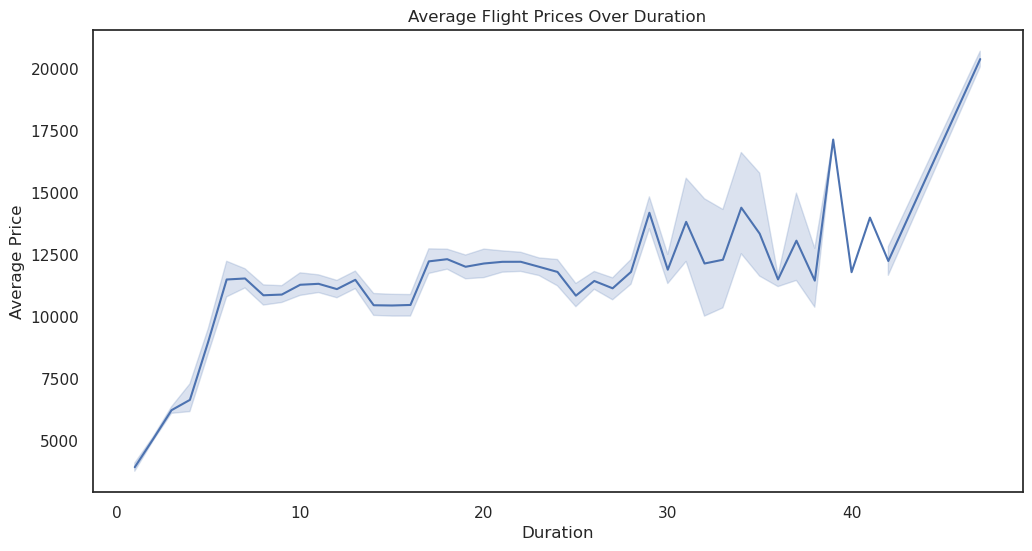

In [51]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Duration', y='Price', data=flight_df)
plt.title('Average Flight Prices Over Duration')
plt.xlabel('Duration')
plt.ylabel('Average Price')
plt.show()

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

In [44]:
flight_df['Total_Stops']=flight_df['Total_Stops'].str.strip().map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})
flight_df['Duration'] = flight_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
flight_df['Duration'] = flight_df['Duration'].str.split(' ').str[0].str.split('m').str[0]
# flight_df = flight_df[flight_df.Duration != '5m']
flight_df['Duration'] = flight_df['Duration'].astype(int)


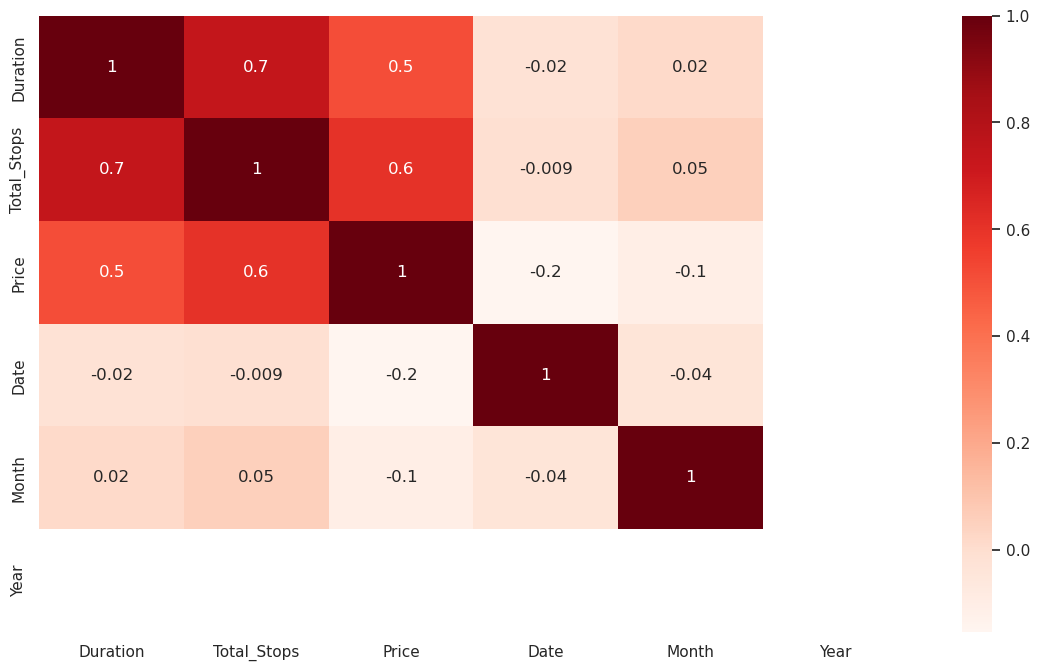

In [45]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = flight_df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, fmt='.1g')

Duration and Total Stops are positively correlated wrt Price. Date and price are slightly negtively correlated.

In [46]:
corr

,Duration,Total_Stops,Price,Date,Month,Year
Duration,1.000000,0.740005,0.508796,-0.022231,0.016095,NaN
Total_Stops,0.740005,1.000000,0.603883,-0.009472,0.054389,NaN
Price,0.508796,0.603883,1.000000,-0.153738,-0.103651,NaN
Date,-0.022231,-0.009472,-0.153738,1.000000,-0.038378,NaN
Month,0.016095,0.054389,-0.103651,-0.038378,1.000000,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2,0,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7,2,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19,2,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5,1,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4,1,No info,13302,1,3,2019


# Google Playstore Dataset

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

In [2]:
google_df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
google_df.shape

(10841, 13)

In [3]:
google_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

In [4]:
google_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [5]:
google_df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [6]:
google_df = google_df.drop(google_df[google_df.Rating > 5].index)

<AxesSubplot: xlabel='Rating', ylabel='Category'>

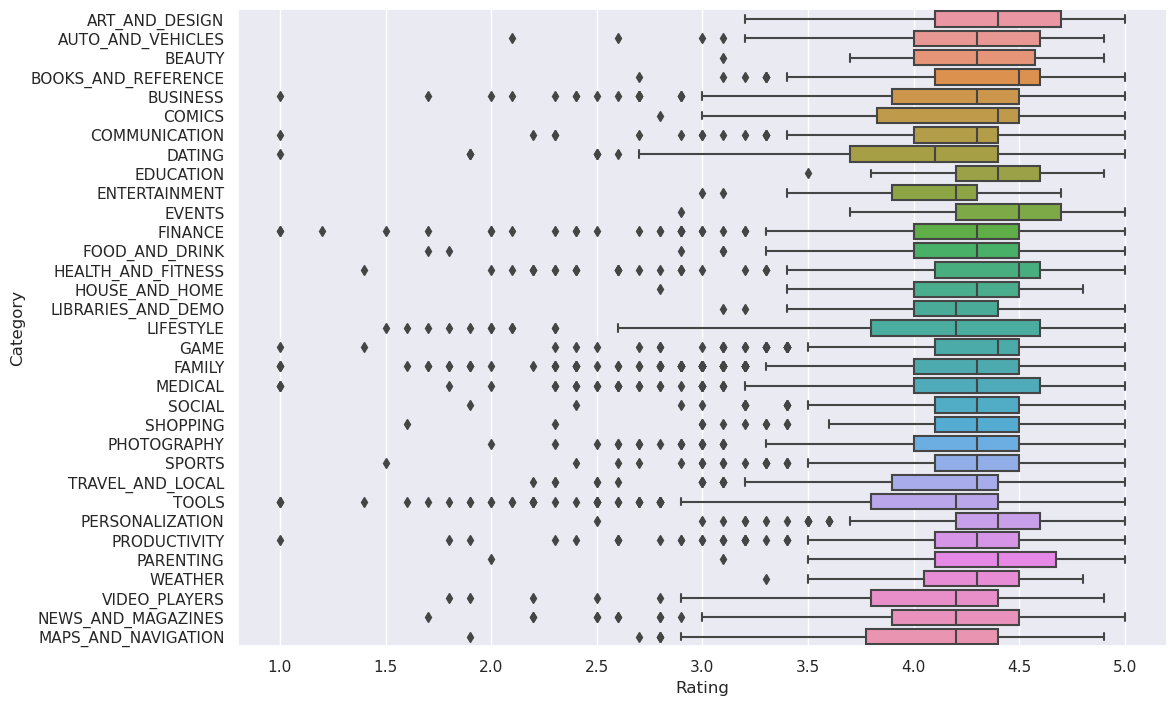

In [7]:
sns.set(rc={'figure.figsize':(11.99,8.27)})
sns.boxplot(x="Rating", y="Category", data=google_df)

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

In [8]:
pd.isnull(google_df).sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

These null values impact while training the model and needs to be handled.

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

In [9]:
google_df['Size']=google_df['Size'].str.replace('M','000')
google_df['Size']=google_df['Size'].str.replace('k','')
google_df['Size']=google_df['Size'].replace('Varies with device',np.nan)
google_df['Size']=google_df['Size'].astype(float)

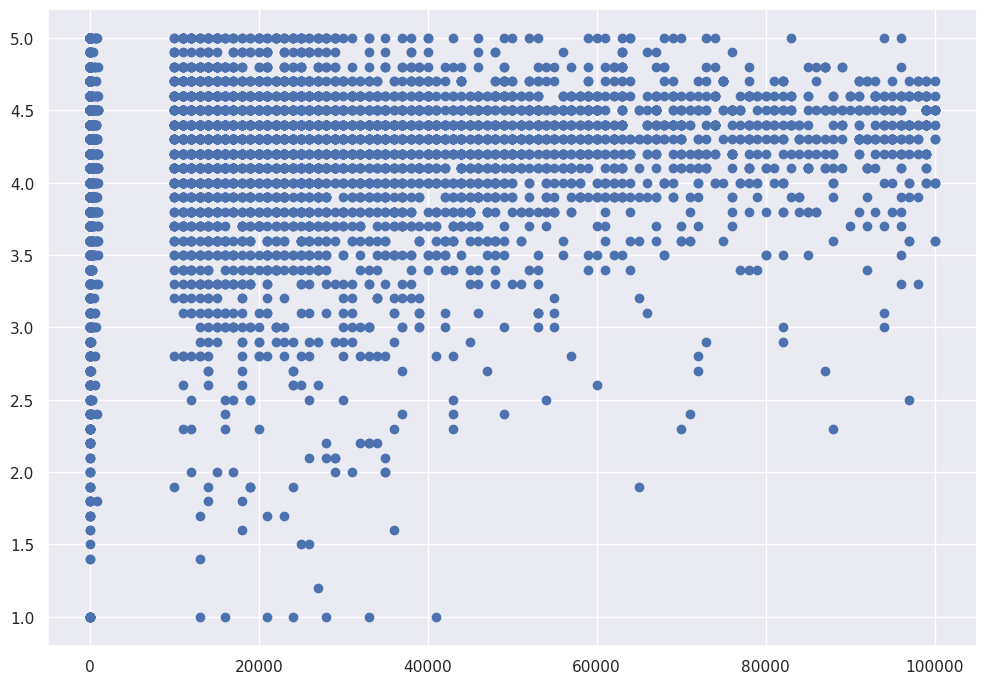

In [10]:
plt.scatter(google_df['Size'], google_df['Rating'])
plt.show()

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [11]:
google_df[google_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [12]:
google_df = google_df.drop(google_df[google_df.Type.isnull()].index)

In [13]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        google_df[cols]=google_df[cols].str.replace(item,'')

In [14]:
google_df['Installs']=google_df['Installs'].astype('int')
google_df['Price']=google_df['Price'].astype('float')

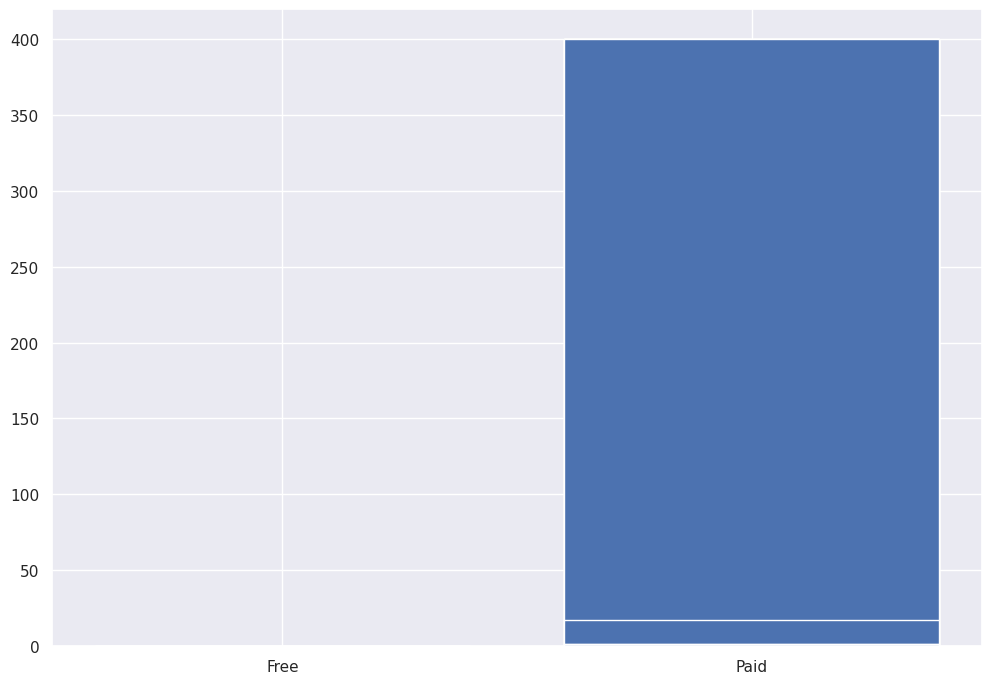

In [15]:
plt.bar(google_df['Type'],google_df['Price'])
plt.show()

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

In [32]:
import pandas as pd

# Assuming df is your DataFrame with columns "App Name" and "Number of Installs"
df = google_df[['App', 'Installs', 'Rating']]

# Sort the DataFrame by 'Number of Installs' in descending order
df_sorted = df.sort_values(by=['Installs','Rating'], ascending=False)

# Display the frequency table
df_sorted.head(10)

,App,Installs,Rating
1654,Subway Surfers,1000000000,4.5
1700,Subway Surfers,1000000000,4.5
1750,Subway Surfers,1000000000,4.5
1872,Subway Surfers,1000000000,4.5
1917,Subway Surfers,1000000000,4.5
2545,Instagram,1000000000,4.5
2604,Instagram,1000000000,4.5
2611,Instagram,1000000000,4.5
2808,Google Photos,1000000000,4.5
2853,Google Photos,1000000000,4.5


Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

In [30]:
import pandas as pd

# Assuming df is your DataFrame with columns "App Name" and "Number of Installs"
df_1 = google_df[['Category', 'Installs']]

# Sort the DataFrame by 'Number of Installs' in descending order
df1_sorted = df_1.sort_values(by='Installs', ascending=False)

# Display the frequency table
df1_sorted

,Category,Installs
3665,VIDEO_PLAYERS,1000000000
4104,COMMUNICATION,1000000000
3896,GAME,1000000000
3996,COMMUNICATION,1000000000
3909,SOCIAL,1000000000
...,...,...
5307,SOCIAL,0
8871,ART_AND_DESIGN,0
5945,FAMILY,0
7434,SOCIAL,0
